In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

def plot_confusion_matrix(y_true, y_pred):
    """Plot a confusion matrix for binary classification problems."""
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()


In [53]:
URL1 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

# Read directly from URL, if offline download the files and replace with local paths.
data = pd.read_csv(URL1)
X = pd.read_csv(URL2)
print('data shape:', data.shape)
print('X shape:', X.shape)
display(data.head())
display(X.head())


data shape: (90, 18)
X shape: (90, 83)


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [54]:
# Create a NumPy array from the 'Class' column
Y = data['Class'].to_numpy()
print('Y shape:', Y.shape)
print('Y sample:', Y[:10])


Y shape: (90,)
Y sample: [0 0 0 0 0 0 1 1 0 0]


In [55]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
print('X standardized shape:', X.shape)


X standardized shape: (90, 83)


In [56]:
#Test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2, stratify=Y
)
print('X_train:', X_train.shape, '| X_test:', X_test.shape)
print('Y_train:', Y_train.shape, '| Y_test:', Y_test.shape)


X_train: (72, 83) | X_test: (18, 83)
Y_train: (72,) | Y_test: (18,)


In [57]:
#Logistic Regression with GridSearchCV
parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression(max_iter=1000)
logreg_cv = GridSearchCV(lr, parameters, cv=10, n_jobs=-1)
logreg_cv.fit(X_train, Y_train)
print('tuned hyperparameters (best parameters):', logreg_cv.best_params_)
print('validation accuracy (cv best_score_):', logreg_cv.best_score_)


tuned hyperparameters (best parameters): {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
validation accuracy (cv best_score_): 0.85


Logistic Regression — test accuracy: 0.8333333333333334


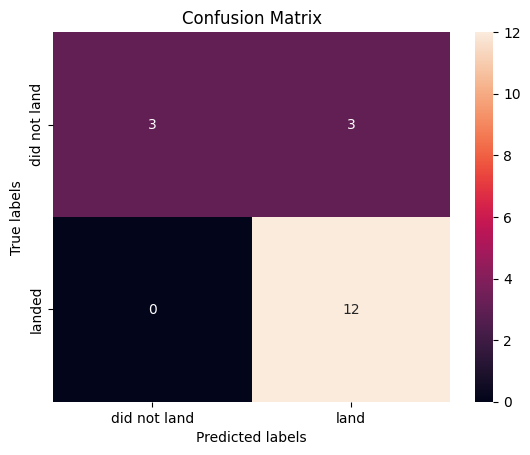

In [58]:
#Logistic Regression Test Accuracy & Confusion Matrix
lr_test_acc = logreg_cv.score(X_test, Y_test)
print('Logistic Regression — test accuracy:', lr_test_acc)
yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr)


In [59]:
#Support Vector Machine with GridSearchCV
parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10, n_jobs=-1)
svm_cv.fit(X_train, Y_train)
print('tuned hyperparameters (best parameters):', svm_cv.best_params_)
print('validation accuracy (cv best_score_):', svm_cv.best_score_)


tuned hyperparameters (best parameters): {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
validation accuracy (cv best_score_): 0.8642857142857144


SVM — test accuracy: 0.8333333333333334


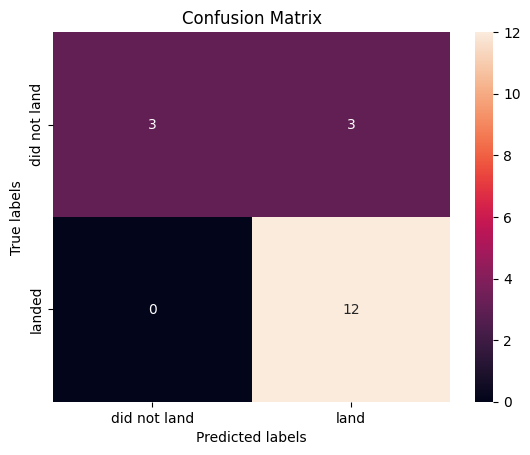

In [60]:
#SVM Test Accuracy & Confusion Matrix
svm_test_acc = svm_cv.score(X_test, Y_test)
print('SVM — test accuracy:', svm_test_acc)
yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm)


In [61]:
#Decision Tree with GridSearchCV
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt', None],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, parameters, cv=10, n_jobs=-1)
tree_cv.fit(X_train, Y_train)
print('tuned hyperparameters (best parameters):', tree_cv.best_params_)
print('validation accuracy (cv best_score_):', tree_cv.best_score_)


tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
validation accuracy (cv best_score_): 0.8928571428571429


Decision Tree — test accuracy: 0.6666666666666666


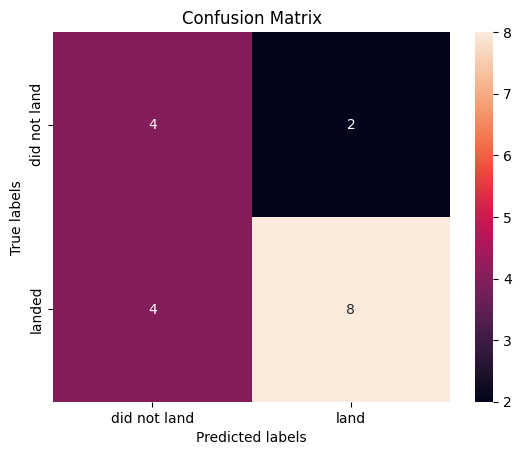

In [62]:
#Decision Tree Test Accuracy & Confusion Matrix
tree_test_acc = tree_cv.score(X_test, Y_test)
print('Decision Tree — test accuracy:', tree_test_acc)
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree)


In [63]:
#K Nearest Neighbors with GridSearchCV
parameters = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10, n_jobs=-1)
knn_cv.fit(X_train, Y_train)
print('tuned hyperparameters (best parameters):', knn_cv.best_params_)
print('validation accuracy (cv best_score_):', knn_cv.best_score_)


tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 4, 'p': 1}
validation accuracy (cv best_score_): 0.8642857142857142


KNN — test accuracy: 0.7777777777777778


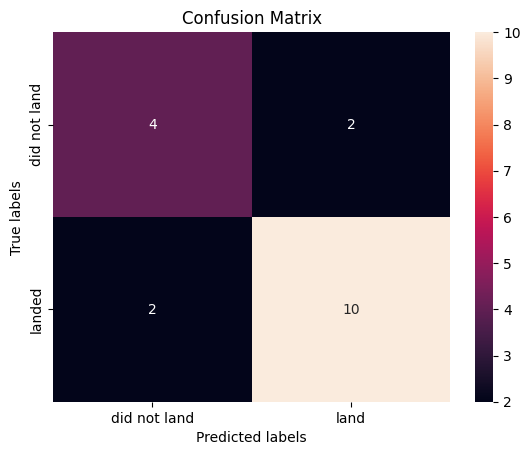

In [64]:
#KNN Test Accuracy & Confusion Matrix
knn_test_acc = knn_cv.score(X_test, Y_test)
print('KNN — test accuracy:', knn_test_acc)
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn)


In [65]:
#Which Method Performs Best
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Test Accuracy': [lr_test_acc, svm_test_acc, tree_test_acc, knn_test_acc]
}).sort_values('Test Accuracy', ascending=False).reset_index(drop=True)
print('Test Accuracy Comparison:')
display(results)
best_model = results.iloc[0]
print(f"Best model on the test set: {best_model['Model']} (accuracy = {best_model['Test Accuracy']:.4f})")


Test Accuracy Comparison:


,Model,Test Accuracy
0,Logistic Regression,0.833333
1,SVM,0.833333
2,KNN,0.777778
3,Decision Tree,0.666667


Best model on the test set: Logistic Regression (accuracy = 0.8333)


,Model,Accuracy
0,Logistic Regression,0.833333
1,SVM,0.833333
2,KNN,0.777778
3,Decision Tree,0.666667


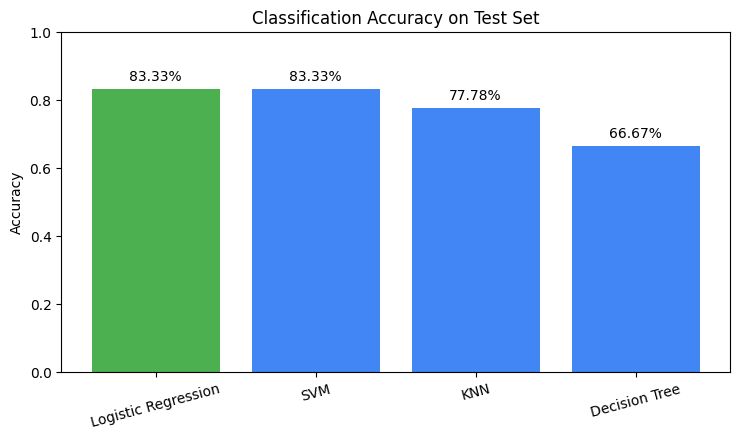

Highest accuracy: Logistic Regression (83.33%)


In [66]:
#Classification Accuracy (Test Set)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# If any of the test acc variables are missing, compute them from the fitted GridSearchCV objects.
def ensure_acc(var_name, fallback_estimator):
    if var_name in globals():
        return globals()[var_name]
    if fallback_estimator is None:
        raise ValueError(f"Missing accuracy and estimator for {var_name}.")
    return accuracy_score(Y_test, fallback_estimator.predict(X_test))

lr_test_acc  = ensure_acc("lr_test_acc",  globals().get("logreg_cv"))
svm_test_acc = ensure_acc("svm_test_acc", globals().get("svm_cv"))
tree_test_acc= ensure_acc("tree_test_acc",globals().get("tree_cv"))
knn_test_acc = ensure_acc("knn_test_acc", globals().get("knn_cv"))

#Build results table
results = pd.DataFrame({
    "Model": ["Logistic Regression", "SVM", "Decision Tree", "KNN"],
    "Accuracy": [lr_test_acc, svm_test_acc, tree_test_acc, knn_test_acc]
}).sort_values("Accuracy", ascending=False).reset_index(drop=True)

display(results)

#Bar chart (sorted, with % labels)
fig, ax = plt.subplots(figsize=(7.5, 4.5))
bars = ax.bar(results["Model"], results["Accuracy"],
              color=["#4CAF50"] + ["#4285F4"]*(len(results)-1))  # highlight best in green
ax.set_title("Classification Accuracy on Test Set")
ax.set_ylabel("Accuracy")
ax.set_ylim(0, 1)
ax.tick_params(axis="x", rotation=15)

for bar, val in zip(bars, results["Accuracy"]):
    ax.text(bar.get_x() + bar.get_width()/2, val + 0.015, f"{val:.2%}",
            ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.savefig("classification_accuracy_bar.png", dpi=200)
plt.show()

#Winner line
best = results.iloc[0]
print(f"Highest accuracy: {best['Model']} ({best['Accuracy']:.2%})")


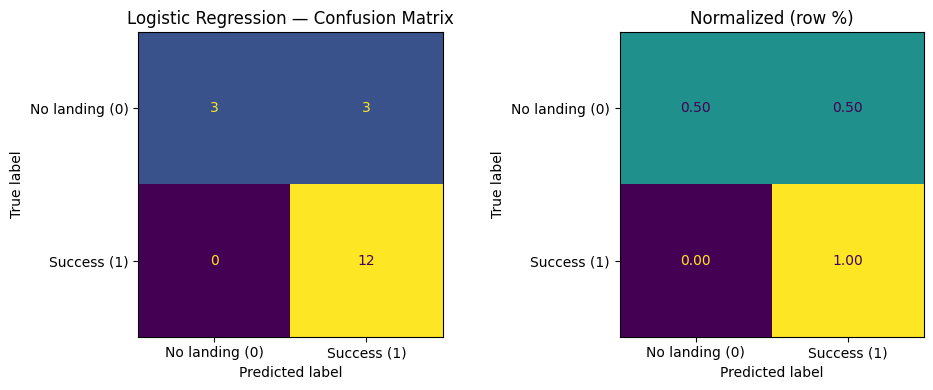

Best model: Logistic Regression — test accuracy 83.33%
TP=12, TN=3, FP=3, FN=0
                precision    recall  f1-score   support

No landing (0)       1.00      0.50      0.67         6
   Success (1)       0.80      1.00      0.89        12

      accuracy                           0.83        18
     macro avg       0.90      0.75      0.78        18
  weighted avg       0.87      0.83      0.81        18



In [67]:
#Confusion Matrix of the Best Model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Collect the fitted estimators and their test accuracies
estimators = {
    "Logistic Regression": globals().get("logreg_cv"),
    "SVM":                 globals().get("svm_cv"),
    "Decision Tree":       globals().get("tree_cv"),
    "KNN":                 globals().get("knn_cv"),
}

accuracies = {}
for name, est in estimators.items():
    if est is None: 
        continue
    acc_var = globals().get(f"{name.lower().replace(' ', '_')}_test_acc")
    accuracies[name] = float(acc_var) if acc_var is not None else est.score(X_test, Y_test)

best_name = max(accuracies, key=accuracies.get)
best_est  = estimators[best_name]
best_acc  = accuracies[best_name]

#Predictions and confusion matrices (label 1 = landing success)
y_pred = best_est.predict(X_test)
cm = confusion_matrix(Y_test, y_pred, labels=[0, 1])  # [[TN, FP],[FN, TP]]

#Plot raw + normalized confusion matrices side-by-side and save
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay(cm, display_labels=["No landing (0)", "Success (1)"])\
    .plot(ax=axes[0], colorbar=False, values_format="d")
axes[0].set_title(f"{best_name} — Confusion Matrix")

ConfusionMatrixDisplay.from_predictions(
    Y_test, y_pred, labels=[0, 1],
    display_labels=["No landing (0)", "Success (1)"],
    normalize="true", values_format=".2f", ax=axes[1], colorbar=False
)
axes[1].set_title("Normalized (row %)")

plt.tight_layout()
plt.savefig("confusion_matrix_best.png", dpi=200)
plt.show()

#Quick textual summary
tn, fp, fn, tp = cm.ravel()
print(f"Best model: {best_name} — test accuracy {best_acc:.2%}")
print(f"TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print(classification_report(Y_test, y_pred, target_names=["No landing (0)", "Success (1)"]))
